### Student Information
Name: 楊閎凱

Student ID: B11611047

GitHub ID: yhk1105

Kaggle name: yhk115

Kaggle private scoreboard snapshot: 
![jupyter](./img/SCR-20241205-bjty.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__. 

In [3]:
### Begin Assignment Here
%cd /Users/yhk/Documents/GitHub/DM2024-Lab2-Homework

/Users/yhk/Documents/GitHub/DM2024-Lab2-Homework


In [5]:
import pandas as pd
import csv
from tqdm import tqdm
import json

# Fix the json file
The file wasn't in appropriate json format, this part is to fix it.

In [ ]:
# Open the JSON file and fix the formatting error
input_file = "tweets_DM.json"
output_file = "tweets_DM_fixed.json"
with open(input_file, 'r') as f:
    # Read all lines and treat them as individual JSON objects
    lines = f.readlines()

# Parse each line as a JSON object and store in a list
json_objects = [json.loads(line.strip()) for line in lines]

# Save the list of JSON objects as a valid JSON array
with open(output_file, 'w') as f:
    json.dump(json_objects, f, indent=4)

In [6]:
with open("dm-2024-isa-5810-lab-2-homework/tweets_DM_fixed.json") as f:
    a = json.load(f)
crawl_df = pd.DataFrame(a)

In [8]:
crawl_df

,_score,_index,_source,_crawldate,_type
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets
...,...,...,...,...,...
1867530,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets
1867531,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets
1867532,498,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...",2016-10-10 11:04:32,tweets
1867533,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets


In [11]:
duplicates = crawl_df.duplicated(subset=['_score'])

# 顯示重複的資料
duplicate_rows = crawl_df[duplicates]
print(duplicate_rows)

         _score          _index  \
42          934  hashtag_tweets   
62          939  hashtag_tweets   
82           81  hashtag_tweets   
110         684  hashtag_tweets   
120         978  hashtag_tweets   
...         ...             ...   
1867530     827  hashtag_tweets   
1867531     368  hashtag_tweets   
1867532     498  hashtag_tweets   
1867533     840  hashtag_tweets   
1867534     360  hashtag_tweets   

                                                   _source  \
42       {'tweet': {'hashtags': [], 'tweet_id': '0x287b...   
62       {'tweet': {'hashtags': [], 'tweet_id': '0x2a46...   
82       {'tweet': {'hashtags': [], 'tweet_id': '0x3667...   
110      {'tweet': {'hashtags': [], 'tweet_id': '0x3403...   
120      {'tweet': {'hashtags': [], 'tweet_id': '0x2b81...   
...                                                    ...   
1867530  {'tweet': {'hashtags': ['mixedfeeling', 'butim...   
1867531  {'tweet': {'hashtags': [], 'tweet_id': '0x29d0...   
1867532  {'tweet': {'

# Orient the dataframe

In [5]:
from tqdm import tqdm
identify = pd.read_csv("data_identification.csv")
tweets = []
identify.set_index('tweet_id', inplace=True)
# Loop through crawl_df with tqdm
for _, row in tqdm(crawl_df.iterrows(), desc="Processing tweets"):
    tweet = {}
    tweet['tweet_id'] = row['_source']['tweet']['tweet_id']
    tweet['text'] = row['_source']['tweet']['text']
    tweet['hashtags'] = row['_source']['tweet']['hashtags']
    tweet['score'] = row['_score']
    
    # Match tweet_id in identify DataFrame and extract identification
    tweet['identify'] = identify.loc[tweet['tweet_id'], 'identification']
    tweets.append(tweet)
tweets_df = pd.DataFrame(tweets)


Processing tweets: 1867535it [00:48, 38873.21it/s]


In [6]:
output_file = "clean_tweets_data.json"

# Save the list to a JSON file
with open(output_file, "w") as f:
    json.dump(tweets, f, indent=4, ensure_ascii=False)

# Seperate train and test set

In [7]:
# Process tweets to create X_train, y_train, and X_test
test_emotion = pd.read_csv("emotion.csv")
X_train = []
y_train = []
X_test = []
test_emotion.set_index('tweet_id', inplace=True)
for i in tqdm(range(len(tweets)), desc="Splitting tweets into train/test"):
    if tweets[i]["identify"] == "train":
        y_train.append(test_emotion.loc[tweets[i]['tweet_id'], 'emotion'])
        X_train.append(tweets[i])
    else:
        X_test.append(tweets[i])

Splitting tweets into train/test: 100%|██████████| 1867535/1867535 [00:06<00:00, 305797.55it/s]


In [8]:
test_emotion

,emotion
tweet_id,
0x3140b1,sadness
0x368b73,disgust
0x296183,anticipation
0x2bd6e1,joy
0x2ee1dd,anticipation
...,...
0x38dba0,joy
0x300ea2,joy
0x360b99,fear


In [9]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train = pd.Series(y_train, name="emotion")
X_train_df['emotion'] = y_train

# Get the labels

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(X_train_df['emotion'])
emotion_types = list(label_encoder.classes_)

LabelEncoder()

# Plot the distribution of the labels

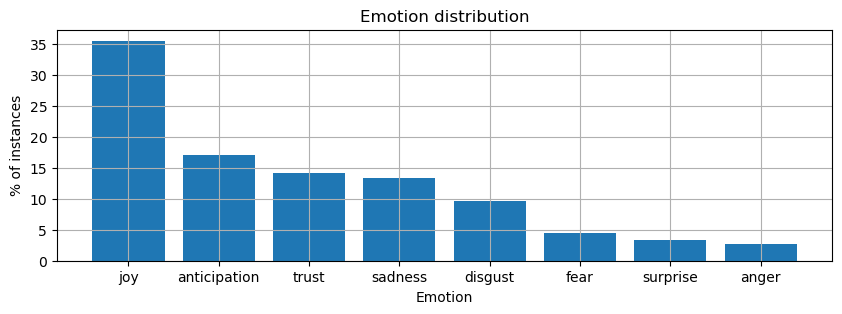

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

df1 = X_train_df['emotion'].value_counts(normalize=True) * 100 
df1 = df1.round(3)

# Plot the histogram
fig, ax = plt.subplots(figsize=(10, 3))
ax.bar(df1.index, df1.values)

# Arrange plot
ax.set_ylabel('% of instances')
ax.set_xlabel('Emotion')
ax.set_title('Emotion distribution')
ax.grid(True)

# Show the plot
plt.show()

# Convert emojis to text

In [ ]:
import emoji

def convert_emoji_to_text(text):
    return emoji.demojize(text)
X_train_df['text'] = X_train_df['text'].apply(convert_emoji_to_text)
X_test_df['text'] = X_test_df['text'].apply(convert_emoji_to_text)


# Remove \<LH\> and punctuation

In [ ]:
X_train_df['text'] = X_train_df['text'].str.replace('<LH>', '', regex=False)
X_test_df['text'] = X_test_df['text'].str.replace('<LH>', '', regex=False)

import re
X_train_df['text'] = X_train_df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
X_test_df['text'] = X_test_df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Expand contractions

In [ ]:
contractions = {" u ": "you", " w/ ": "with", " dont ": "do not", " cant ": "cannot"}
def expand_contractions(text):
    for word, expanded in contractions.items():
        text = text.replace(word, expanded)
    return text

X_train_df['text'] = X_train_df['text'].apply(expand_contractions)
X_test_df['text'] = X_test_df['text'].apply(expand_contractions)

# Correct spelling

In [ ]:
from spellchecker import SpellChecker
spell = SpellChecker()

def correct_spelling(text):
    return ' '.join([spell.correction(word) if word in spell else word for word in text.split()])

X_train_df['text'] = X_train_df['text'].apply(correct_spelling)
X_test_df['text'] = X_test_df['text'].apply(correct_spelling)

# Save the dataframes

In [16]:
X_train_df.to_pickle("X_train_df.pkl") 
X_test_df.to_pickle("X_test_df.pkl")

# Load the dataframes

In [12]:
X_train_df = pd.read_pickle("dm-2024-isa-5810-lab-2-homework/X_train_df.pkl") 
X_test_df = pd.read_pickle("dm-2024-isa-5810-lab-2-homework/X_test_df.pkl")
y_train = X_train_df['emotion']
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(X_train_df['emotion'])
emotion_types = list(label_encoder.classes_)

In [14]:
duplicates = X_train_df.duplicated(subset=['text','tweet_id'])

# 顯示重複的資料
duplicate_rows = X_train_df[duplicates]
print(duplicate_rows)

Empty DataFrame
Columns: [tweet_id, text, hashtags, score, identify, emotion]
Index: []


# Make part of the training data as validation data

In [25]:
from sklearn.model_selection import train_test_split

X_subtrain, X_subtest, y_subtrain, y_subtest = train_test_split(
    X_train_df, y_train, test_size=0.2, random_state=42, shuffle=True
)

# Using hashtags to train model

In [ ]:
withhashtags = X_train_df[X_train_df['hashtags'].apply(len) > 0]
withhashtags['new_hashtags'] = withhashtags['hashtags'].apply(lambda x: ' '.join(x))
withhashtagsX_subtrain, withhashtagsX_subtest, withhashtagsy_subtrain, withhashtagsy_subtest = train_test_split(
    withhashtags, withhashtags['emotion'], test_size=0.2, random_state=42, shuffle=True
)

/var/folders/wt/6hl8qhss3jz9zrdh6n8f3_qh0000gn/T/ipykernel_71446/4107780806.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  withhashtags['new_hashtags'] = withhashtags['hashtags'].apply(lambda x: ' '.join(x))


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=sns.cubehelix_palette(as_cmap=True)):
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(12,12))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

# Method 1: TFIDF + Decision Tree with hashtags

In [36]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
# build analyzers (bag-of-words)
BOW = TfidfVectorizer(max_features = 15000, tokenizer=nltk.word_tokenize) 
# apply analyzer to training data
BOW.fit(withhashtagsX_subtrain['new_hashtags'])
withhashtagsX_subtrain = BOW.transform(withhashtagsX_subtrain['new_hashtags'])
withhashtagsX_subtest = BOW.transform(withhashtagsX_subtest['new_hashtags'])

/Users/yhk/tensorflow-test/env/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [37]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(random_state=1)

# training
DT_model = DT_model.fit(withhashtagsX_subtrain, withhashtagsy_subtrain)

# predict
y_subtrain_pred = DT_model.predict(withhashtagsX_subtrain)
y_subtest_pred = DT_model.predict(withhashtagsX_subtest)

training accuracy: 0.68
testing accuracy: 0.53
              precision    recall  f1-score   support

       anger       0.45      0.21      0.29      3597
anticipation       0.62      0.52      0.57     30568
     disgust       0.48      0.37      0.42     14945
        fear       0.58      0.30      0.40      4607
         joy       0.50      0.79      0.61     52622
     sadness       0.55      0.37      0.44     18138
    surprise       0.61      0.24      0.35      4970
       trust       0.58      0.33      0.42     22394

    accuracy                           0.53    151841
   macro avg       0.55      0.39      0.44    151841
weighted avg       0.54      0.53      0.51    151841



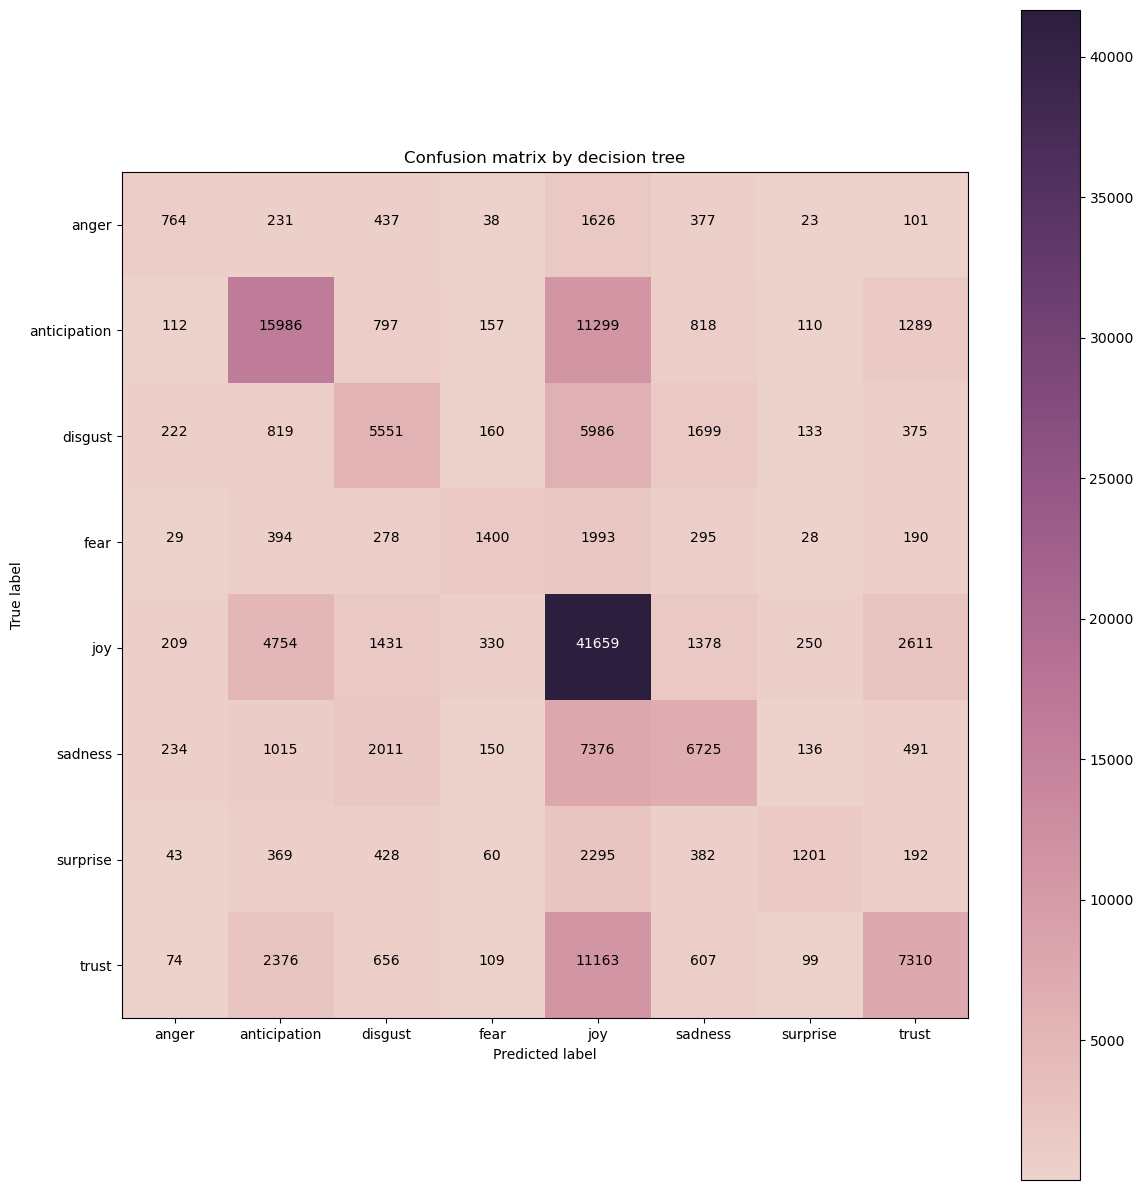

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

acc_subtrain = accuracy_score(y_true=withhashtagsy_subtrain, y_pred=y_subtrain_pred)
acc_subtest = accuracy_score(y_true=withhashtagsy_subtest, y_pred=y_subtest_pred)

print('training accuracy: {}'.format(round(acc_subtrain, 2)))
print('testing accuracy: {}'.format(round(acc_subtest, 2)))

print(classification_report(y_true=withhashtagsy_subtest, y_pred=y_subtest_pred))

cm = confusion_matrix(y_true=withhashtagsy_subtest, y_pred=y_subtest_pred) 
plot_confusion_matrix(cm, classes=emotion_types, title='Confusion matrix by decision tree')

From this confusion matrix, we can see that the model is good at predicting 'joy', and easily predict other categories as 'joy'. This may be due to the unbalance of the data.

# Extract Emotional words from text
However, there are lots of data that don't have hashtags. Therefore, I will extract emotional words from the text with three different methods.

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package brown to /Users/yhk/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /Users/yhk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/yhk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yhk/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /Users/yhk/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/yhk/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yhk/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /Users/yhk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/yhk/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yhk/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/yhk/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [9]:
from afinn import Afinn
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

afinn = Afinn()
analyzer = SentimentIntensityAnalyzer()

# Initialize new fields
X_train_df['afinn_words'] = ''
X_train_df['vader_words'] = ''
X_train_df['nrc_words'] = ''

for index, row in X_train_df.iterrows():
    text = row['text']

   # AFINN: Use afinn to analyze the sentiment score of the words, words with a score greater than 0 can be considered positive emotions
    afinn_words = [word for word in text.split() if afinn.score(word) > 0]
    X_train_df.at[index, 'afinn_words'] = afinn_words

    # VADER: Use VaderSentiment to extract positive and negative emotional words
    vader_scores = analyzer.polarity_scores(text)
    vader_words = []
    for word in text.split():
        score = analyzer.polarity_scores(word)
        if score['compound'] != 0:
            vader_words.append(word)
    X_train_df.at[index, 'vader_words'] = vader_words

    # NRC: Use TextBlob to analyze the sentiment and extract words that may represent emotions
    blob = TextBlob(text)
    nrc_words = [word for word, tag in blob.tags if tag in ['JJ', 'RB', 'VB']]  # Extract adjectives, adverbs, and verbs
    X_train_df.at[index, 'nrc_words'] = nrc_words


In [10]:
for index, row in X_train_df.iterrows():
    temp=''
    temp+= " ".join(X_train_df.at[index, 'afinn_words'])
    temp+= " "
    temp+= " ".join(X_train_df.at[index, 'vader_words'])
    temp+= " "
    temp+= " ".join(X_train_df.at[index, 'nrc_words'])
    temp+= " "
    temp+= " ".join(X_train_df.at[index, 'hashtags'])
    X_train_df.at[index, 'tags']=temp

In [11]:
temp = X_train_df[X_train_df['tags'].apply(len) > 0]

In [12]:
withnewtagsX_subtrain, withnewtagsX_subtest, withnewtagsy_subtrain, withnewtagsy_subtest = train_test_split(
    temp, temp['emotion'], test_size=0.2, random_state=42, shuffle=True
)

# Method 2:Use emotional word tags and TFIDF with Decision tree

In [13]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
BOW = TfidfVectorizer(max_features = 15000, tokenizer=nltk.word_tokenize) 
BOW.fit(withnewtagsX_subtrain['tags'])
withnewtagsX_subtrain = BOW.transform(withnewtagsX_subtrain['tags'])
withnewtagsX_subtest = BOW.transform(withnewtagsX_subtest['tags'])


/Users/yhk/tensorflow-test/env/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(random_state=1)

# training
DT_model = DT_model.fit(withnewtagsX_subtrain, withnewtagsy_subtrain)

# predict
y_subtrain_pred = DT_model.predict(withnewtagsX_subtrain)
y_subtest_pred = DT_model.predict(withnewtagsX_subtest)

training accuracy: 0.89
testing accuracy: 0.45
              precision    recall  f1-score   support

       anger       0.25      0.19      0.22      7946
anticipation       0.47      0.46      0.47     49984
     disgust       0.32      0.26      0.29     27669
        fear       0.28      0.23      0.25     12846
         joy       0.51      0.67      0.58    102943
     sadness       0.40      0.33      0.36     38745
    surprise       0.36      0.20      0.26      9816
       trust       0.42      0.28      0.34     41164

    accuracy                           0.45    291113
   macro avg       0.38      0.33      0.35    291113
weighted avg       0.43      0.45      0.43    291113



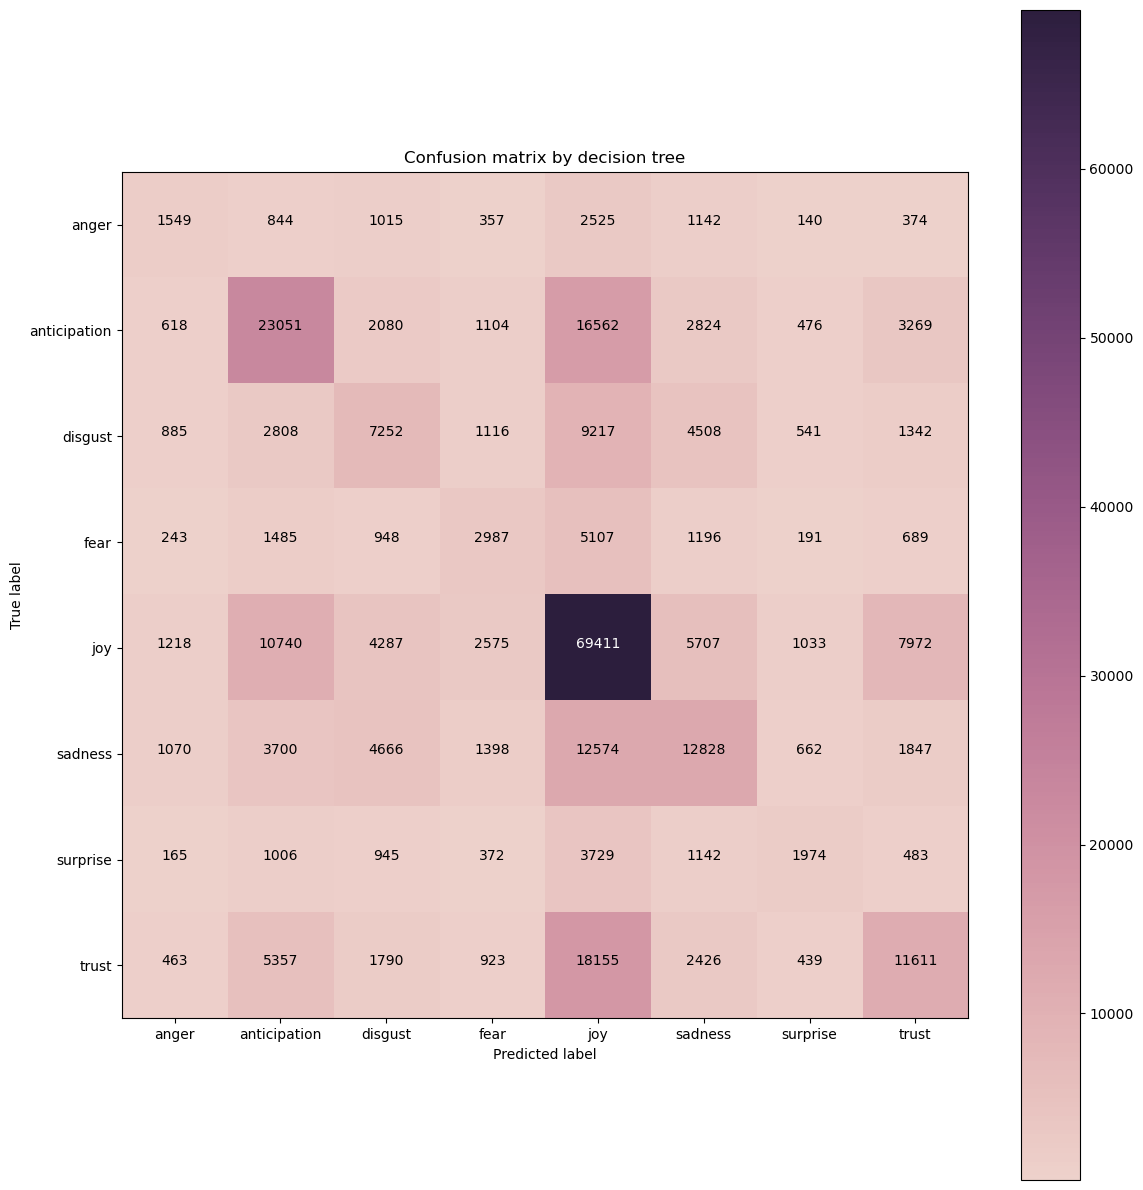

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

acc_subtrain = accuracy_score(y_true=withnewtagsy_subtrain, y_pred=y_subtrain_pred)
acc_subtest = accuracy_score(y_true=withnewtagsy_subtest, y_pred=y_subtest_pred)

print('training accuracy: {}'.format(round(acc_subtrain, 2)))
print('testing accuracy: {}'.format(round(acc_subtest, 2)))

print(classification_report(y_true=withnewtagsy_subtest, y_pred=y_subtest_pred))

cm = confusion_matrix(y_true=withnewtagsy_subtest, y_pred=y_subtest_pred) 
plot_confusion_matrix(cm, classes=emotion_types, title='Confusion matrix by decision tree')

However, there are still lots of data missing emotion words. Also, the result turned out to be overfitting.

# The Methods below all use the entire text to analyze.

# Method 3:TFIDF + Decision Tree

In [16]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

BOW = TfidfVectorizer(max_features = 15000, tokenizer=nltk.word_tokenize) 

BOW.fit(X_subtrain['text'])
X_subtrain = BOW.transform(X_subtrain['text'])
X_subtest = BOW.transform(X_subtest['text'])
X_test = BOW.transform(X_test_df['text'])

/Users/yhk/tensorflow-test/env/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [44]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(random_state=1)

# training
DT_model = DT_model.fit(X_subtrain, y_subtrain)

# predict
y_subtrain_pred = DT_model.predict(X_subtrain)
y_subtest_pred = DT_model.predict(X_subtest)

training accuracy: 0.99
testing accuracy: 0.43
              precision    recall  f1-score   support

       anger       0.23      0.18      0.20      7946
anticipation       0.46      0.44      0.45     49984
     disgust       0.29      0.27      0.28     27669
        fear       0.38      0.32      0.34     12846
         joy       0.53      0.60      0.56    102943
     sadness       0.38      0.37      0.37     38745
    surprise       0.26      0.21      0.23      9816
       trust       0.34      0.31      0.33     41164

    accuracy                           0.43    291113
   macro avg       0.36      0.34      0.35    291113
weighted avg       0.42      0.43      0.43    291113



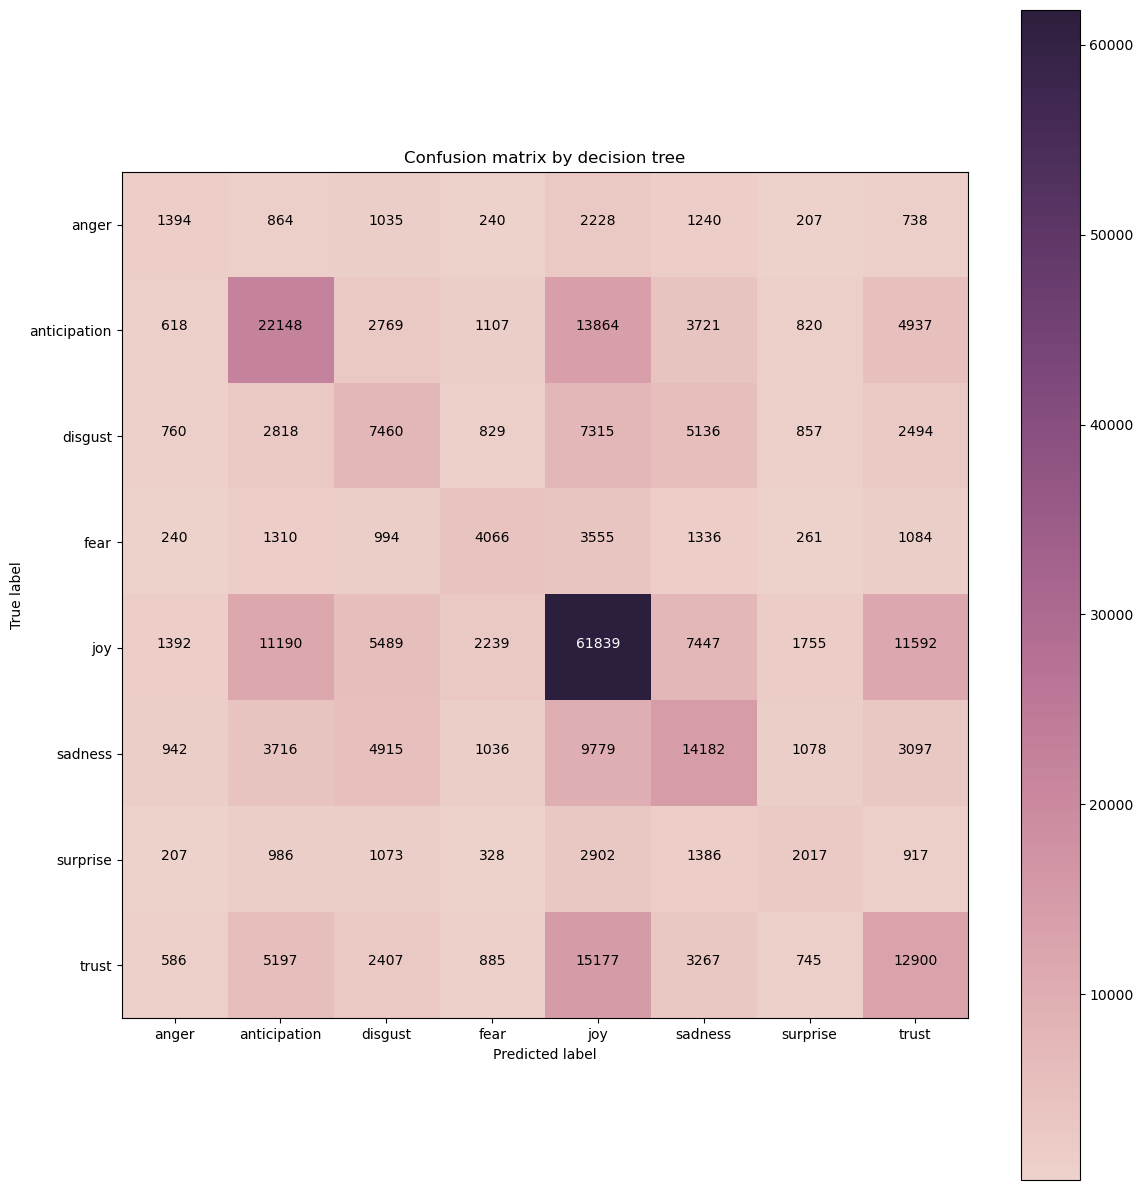

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

acc_subtrain = accuracy_score(y_true=y_subtrain, y_pred=y_subtrain_pred)
acc_subtest = accuracy_score(y_true=y_subtest, y_pred=y_subtest_pred)

print('training accuracy: {}'.format(round(acc_subtrain, 2)))
print('testing accuracy: {}'.format(round(acc_subtest, 2)))

print(classification_report(y_true=y_subtest, y_pred=y_subtest_pred))

cm = confusion_matrix(y_true=y_subtest, y_pred=y_subtest_pred) 
plot_confusion_matrix(cm, classes=emotion_types, title='Confusion matrix by decision tree')

The result is overfitting. Meanwhile, lots of non-joy data are categorized as 'joy'.

# Method 4: NB classification + TFIDF

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
nb_classifier = MultinomialNB()
nb_classifier = nb_classifier.fit(X_subtrain, y_subtrain)
y_subtest_pred = nb_classifier.predict(X_subtest)


subtrain test result
              precision    recall  f1-score   support

       anger       0.38      0.33      0.36     31921
anticipation       0.57      0.52      0.55    198951
     disgust       0.41      0.51      0.45    111432
        fear       0.40      0.46      0.43     51153
         joy       0.60      0.65      0.63    413074
     sadness       0.47      0.48      0.48    154692
    surprise       0.40      0.26      0.32     38913
       trust       0.47      0.37      0.42    164314

    accuracy                           0.52   1164450
   macro avg       0.46      0.45      0.45   1164450
weighted avg       0.52      0.52      0.52   1164450

subtest test result
              precision    recall  f1-score   support

       anger       0.34      0.29      0.31      7946
anticipation       0.56      0.52      0.54     49984
     disgust       0.39      0.48      0.43     27669
        fear       0.38      0.44      0.41     12846
         joy       0.59      0.64    

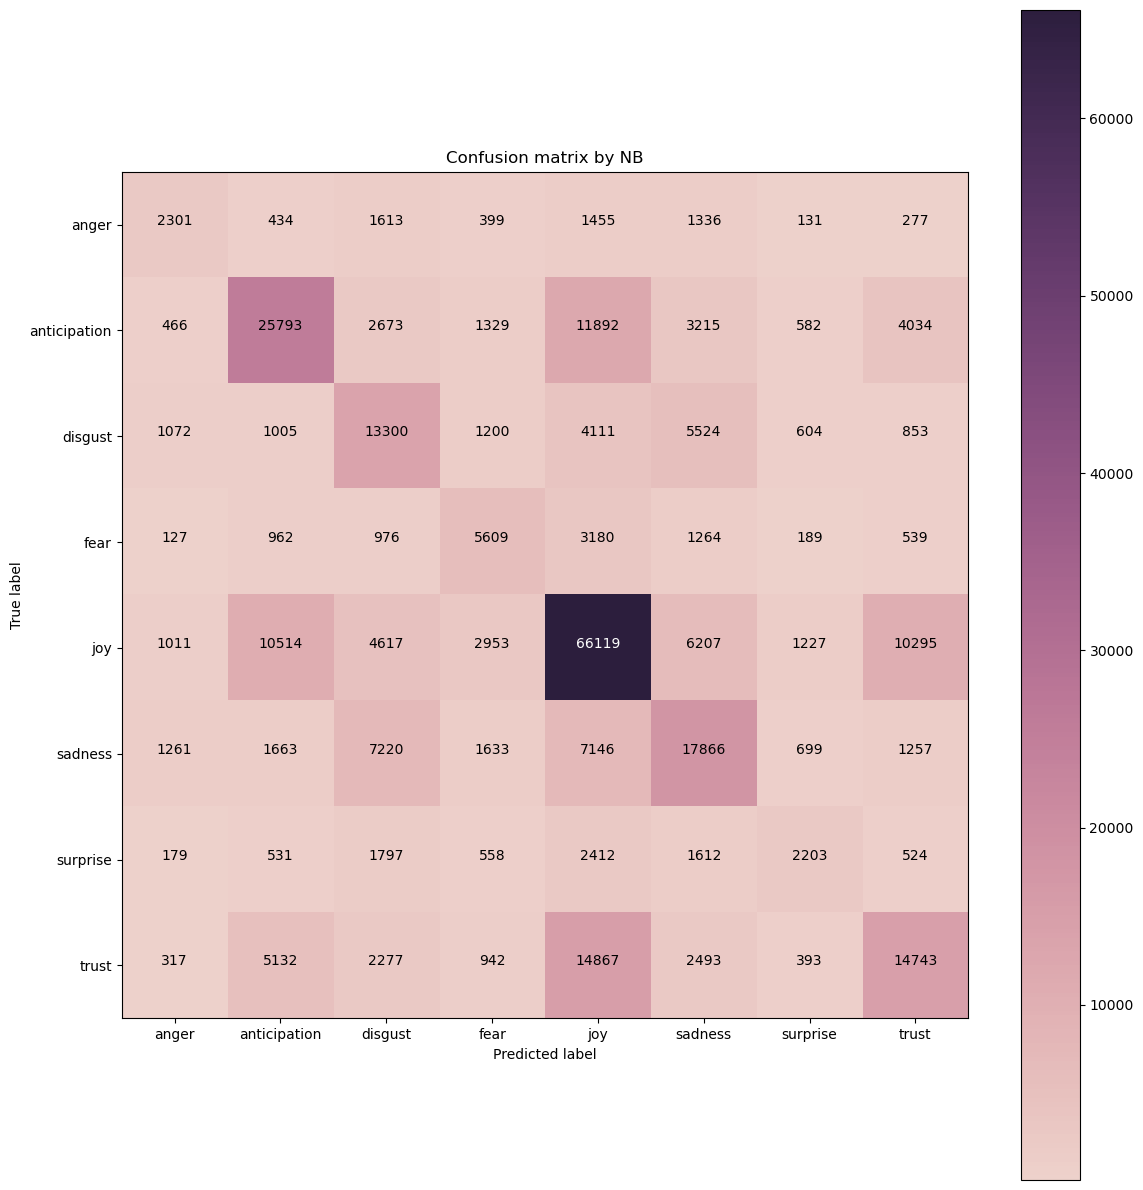

In [ ]:
print("subtrain test result")
print(classification_report(y_true=y_subtrain, y_pred=y_subtrain_pred))
print("subtest test result")
print(classification_report(y_true=y_subtest, y_pred=y_subtest_pred))
cm = confusion_matrix(y_true=y_subtest, y_pred=y_subtest_pred) 
plot_confusion_matrix(cm, classes=emotion_types, title='Confusion matrix by NB')

This method utilizes the probability a pattern appear in the data. The result is better than the Decision Tree, but still not good. We can find out that the results of "trust", "sadness" and "disgust" performed better on this model than the former models.

# Method 5: Deep Learning + TFIDF

In [33]:
import keras
def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

y_subtrain_encode = label_encode(label_encoder, y_subtrain)
y_subtest_encode = label_encode(label_encoder, y_subtest)
input_shape = X_subtrain.shape[1]
output_shape = len(emotion_types)

In [ ]:
from keras.layers import Input, Dense, Dropout, ReLU, Softmax
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import CSVLogger, EarlyStopping

# Input layer
model_input = Input(shape=(input_shape,))

# Hidden layer
X_W1 = Dense(units=128)(model_input)
H1 = ReLU()(X_W1)
H1 = Dropout(0.5)(H1)

H1_W2 = Dense(units=64)(H1)
H2 = ReLU()(H1_W2)
H2 = Dropout(0.5)(H2)

# Output layer
H2_W3 = Dense(units=output_shape)(H2)
model_output = Softmax()(H2_W3)

# Create model
model = Model(inputs=[model_input], outputs=[model_output])

# Optimizer and loss function
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Training settings
csv_logger = CSVLogger('logs/training_log.csv')
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
X_subtrain_df = np.vstack(X_subtrain['embeddings'].values)
X_subtest_df = np.vstack(X_subtest['embeddings'].values)
# Model training
history = model.fit(X_subtrain_df, y_subtrain_encode, 
                    epochs=25, 
                    batch_size=128,  # Reduce batch size
                    callbacks=[csv_logger, early_stopping],
                    validation_data=(X_subtest_df, y_subtest_encode))


# Model prediction
pred_result = model.predict(X_subtest_df, batch_size=128)

Testing Accuracy: 0.56


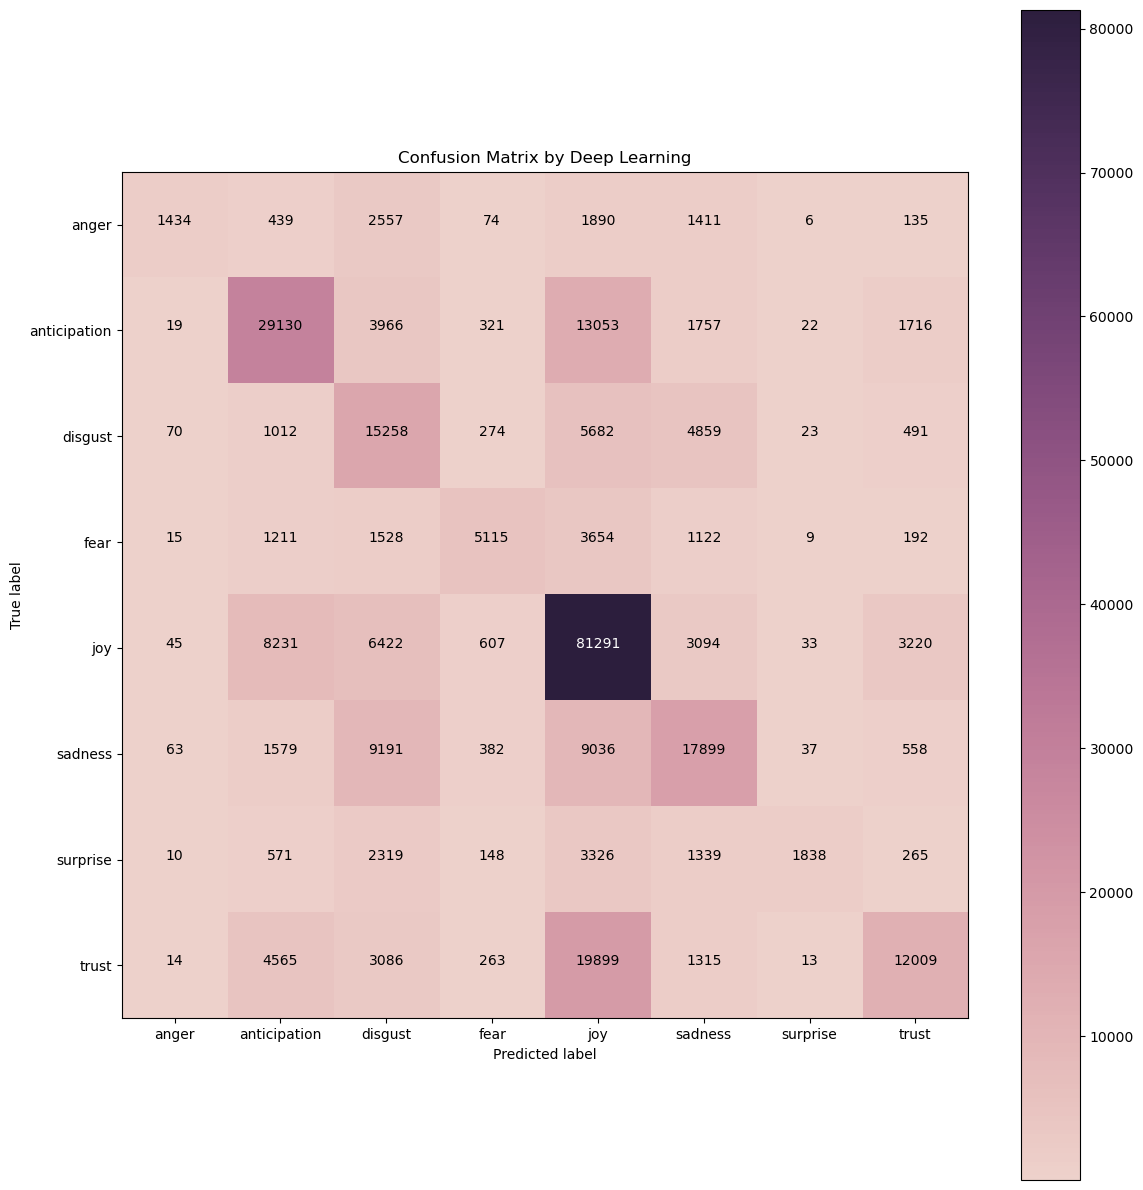

In [18]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)
print('Testing Accuracy:', round(accuracy_score(y_subtest,label_decode(label_encoder, pred_result)), 2))

# 混淆矩陣
cm = confusion_matrix(y_true=y_subtest, y_pred=label_decode(label_encoder, pred_result))
plot_confusion_matrix(cm, classes=emotion_types, title='Confusion Matrix by Deep Learning')

In [ ]:
incorrect_indices = [i for i, (true, pred) in enumerate(zip(y_subtest, pred_result)) if true != pred]
for idx in incorrect_indices:
    print(f"Text: {X_subtest_df.iloc[idx]['text']}")
    print(f"True Label: {y_subtest.iloc[idx]}")
    print(f"Predicted Label: {pred_result[idx]}")
    print("-" * 50)

# Embedding
This dataset is too big for ollama to embed. Therefore, I chose to use a model paraphrase-mpnet-base-v2 with sentence-transformers.

In [17]:
import ollama
df_train = X_subtrain_df
df_test = X_subtest_df
# Define a function to generate embeddings
def generate_embeddings(row,text_column_name='text'):
    embeddings = ollama.embeddings(
        model='llama3.2',
        prompt=row[text_column_name],
    )
    return embeddings["embedding"]

In [ ]:
from tqdm import tqdm

# Initialize tqdm for pandas
tqdm.pandas()

# Apply function with progress bar
X_train_df['embeddings'] = X_train_df.progress_apply(lambda row: generate_embeddings(row, 'text'), axis=1)
X_test_df['embeddings'] = X_test_df.progress_apply(lambda row: generate_embeddings(row, 'text'), axis=1)


In [18]:
!pip install -U sentence-transformers

# Use SentenceTransformer to embed and store the embedded result in the dataframe

In [ ]:
from sentence_transformers import SentenceTransformer

# Load pre-trained model
model = SentenceTransformer('paraphrase-mpnet-base-v2')
from tqdm import tqdm
# Initialize tqdm progress bar
tqdm.pandas()

# Use SentenceTransformer to generate embeddings for the training set
X_train_df['embeddings'] = X_train_df['text'].progress_apply(lambda x: model.encode(x))

# Use SentenceTransformer to generate embeddings for the test set
X_test_df['embeddings'] = X_test_df['text'].progress_apply(lambda x: model.encode(x))

In [14]:
import pandas as pd
X_train_df_ST = pd.read_pickle("dm-2024-isa-5810-lab-2-homework/SentenceTransformer_train_df1.pkl") 
X_test_df_ST = pd.read_pickle("dm-2024-isa-5810-lab-2-homework/SentenceTransformer_test_df1.pkl")
y_train = X_train_df_ST['emotion']

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(X_train_df_ST['emotion'])
emotion_types = list(label_encoder.classes_)

# Determine the dimension needed

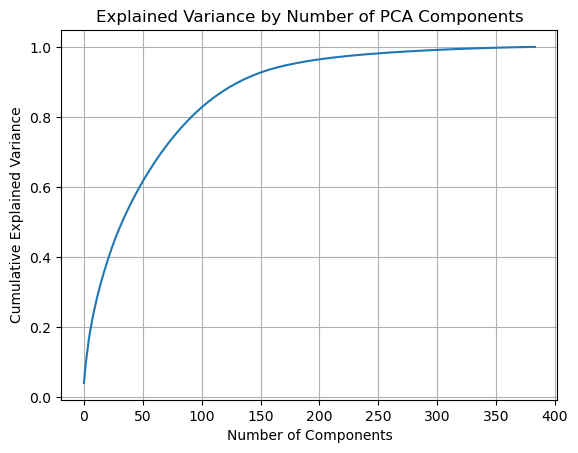

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Convert embeddings to NumPy 2D array
embeddings = np.vstack(X_train_df_ST["embeddings"].values)

# Use PCA
pca = PCA()
pca.fit(embeddings)

# Calculate cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of PCA Components')
plt.grid(True)
plt.show()


By looking at this graph we can know that we can capture 80% of the information with about 100 dimensions, and 90% with about 150 dimensions. Therefore, I chose 100 and 150 dimensions. By reducing the dimensionality, the model can run faster and reduce the effect of curse of dimensionality.

In [15]:
from sklearn.model_selection import train_test_split

X_subtrain, X_subtest, y_subtrain, y_subtest = train_test_split(
    X_train_df_ST, y_train, test_size=0.8, random_state=42, shuffle=True
)

#Method 6-1: PCA(100 d) + KNN

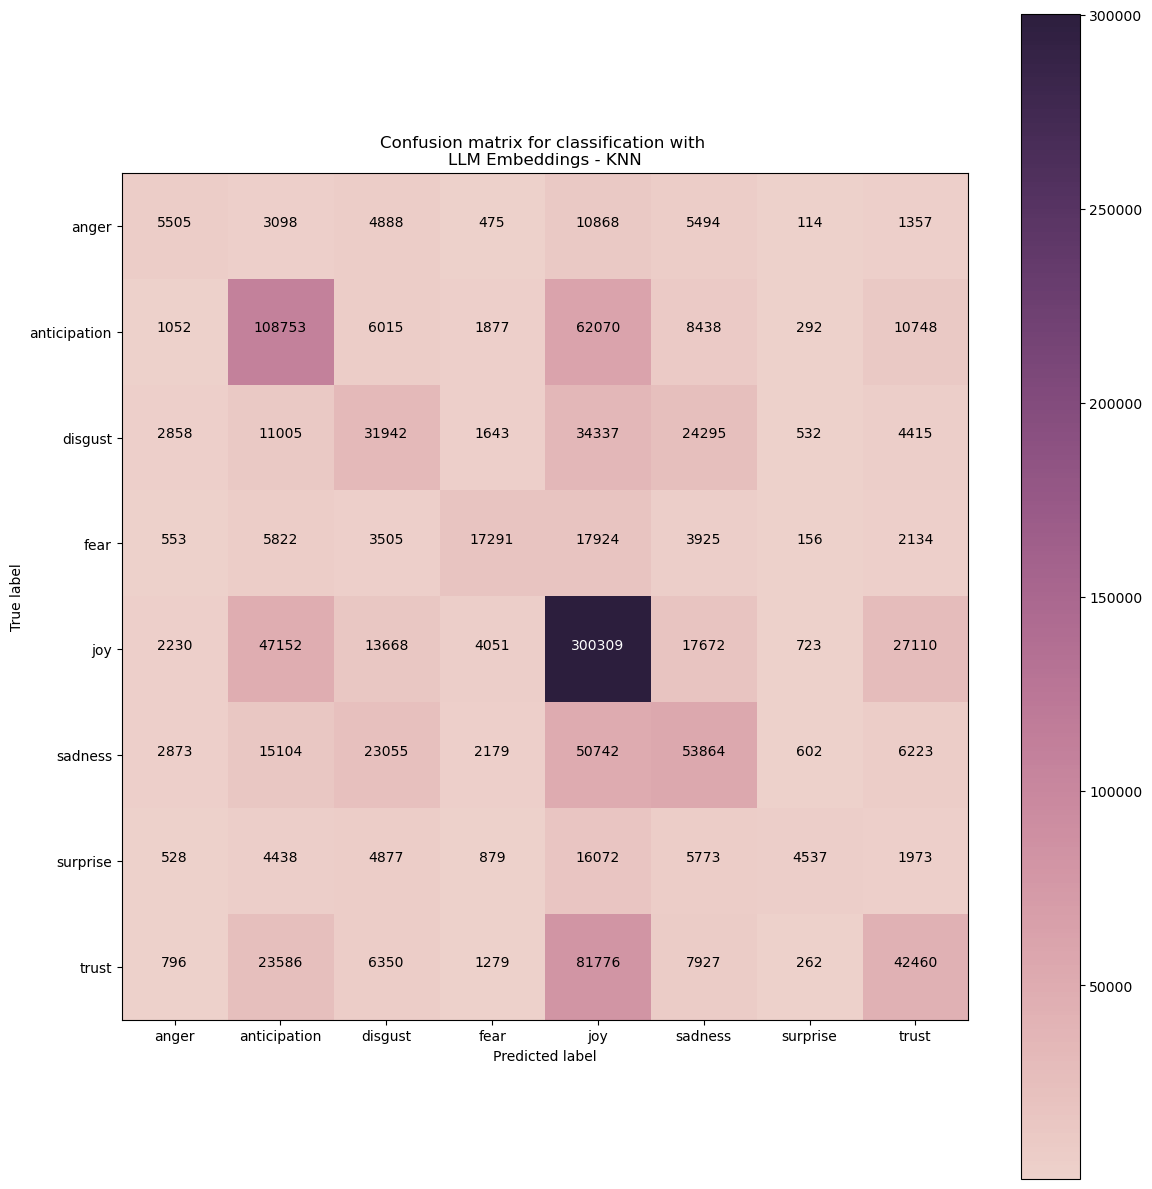

In [18]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# PCA dimension reduction to 100 dimensions
pca = PCA(n_components=100)

# Dimension reduction for training and test data
X_subtrain_embed = np.vstack(X_subtrain["embeddings"].tolist())  # Convert embeddings to NumPy array
X_subtrain_pca = pca.fit_transform(X_subtrain_embed)  # Dimension reduction for training data

X_subtest_embed = np.vstack(X_subtest["embeddings"].tolist())
X_subtest_pca = pca.transform(X_subtest_embed)  # Dimension reduction for test data

# Initialize KNN
knn = KNeighborsClassifier(n_neighbors=10)

# Train KNN
knn.fit(X_subtrain_pca, y_subtrain)

# Predict test data
y_pred = knn.predict(X_subtest_pca)

# Calculate model accuracy
accuracy = accuracy_score(y_subtest, y_pred)
print(f'KNN Accuracy with PCA (100 dimensions): {accuracy}')

cm2 = confusion_matrix(y_true=y_subtest, y_pred=y_pred) 
plot_confusion_matrix(cm2, classes=emotion_types, title='Confusion matrix for classification with \nLLM Embeddings - KNN')

# Method 6-2:PCA(150 d) + KNN

KNN Accuracy with PCA (150 dimensions): 0.48716691385038957
KNN Accuracy: 0.48716691385038957


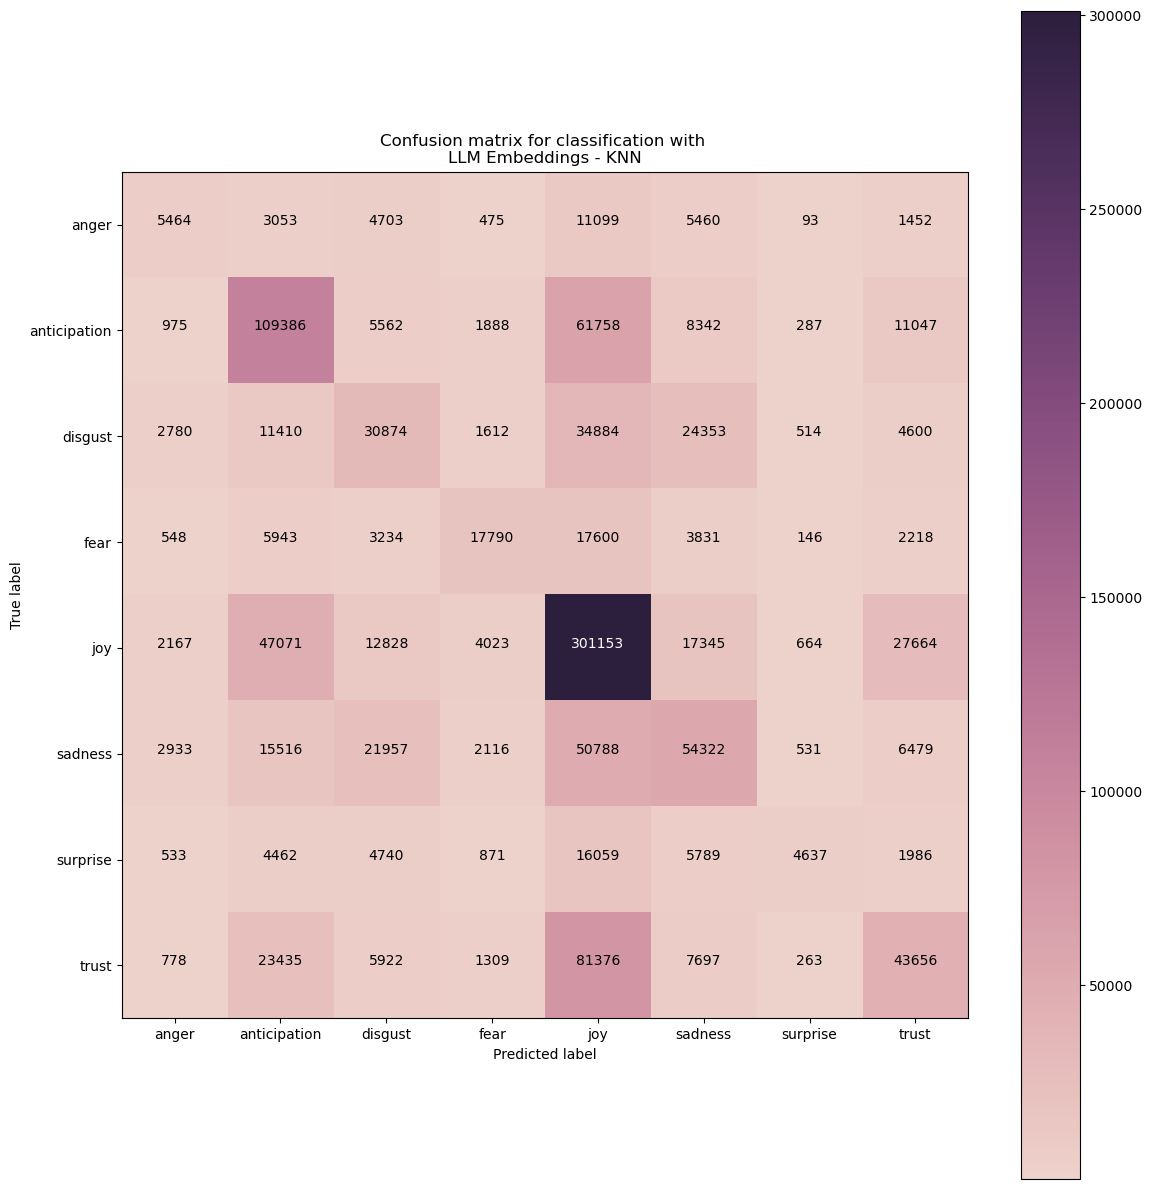

In [11]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# PCA dimension reduction to 150 dimensions
pca = PCA(n_components=150)

# Dimension reduction for training and test data
X_subtrain_embed = np.vstack(X_subtrain["embeddings"].tolist())  # Convert embeddings to NumPy array
X_subtrain_pca = pca.fit_transform(X_subtrain_embed)  # Dimension reduction for training data

X_subtest_embed = np.vstack(X_subtest["embeddings"].tolist())
X_subtest_pca = pca.transform(X_subtest_embed)  # Dimension reduction for test data

# Initialize KNN
knn = KNeighborsClassifier(n_neighbors=10)

# Train KNN
knn.fit(X_subtrain_pca, y_subtrain)

# Predict test data
y_pred = knn.predict(X_subtest_pca)

# Calculate model accuracy
accuracy = accuracy_score(y_subtest, y_pred)
print(f'KNN Accuracy with PCA (150 dimensions): {accuracy}')


print(f'KNN Accuracy: {accuracy}')
cm2 = confusion_matrix(y_true=y_subtest, y_pred=y_pred) 
plot_confusion_matrix(cm2, classes=emotion_types, title='Confusion matrix for classification with \nLLM Embeddings - KNN')

By observing the confusion matrice of 100d and 150d, we can find out that the results of each category all improved. This is because the more dimension we reserved for the model the more information the model can capture.


# Method 7: UMAP+KNN
Find the best neighbor number while using UMAP to reduce the dimension.

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import umap
import matplotlib.pyplot as plt
import numpy as np

# Dimension reduction to 130 dimensions using UMAP
umap_reducer = umap.UMAP(n_components=130, n_jobs=-1)  # Use all available CPU threads


# Dimension reduction for training and test data
X_subtrain_embed = np.vstack(X_subtrain["embeddings"].tolist())  # Convert embeddings to NumPy array
X_subtrain_umap = umap_reducer.fit_transform(X_subtrain_embed)  # Dimension reduction for training data

X_subtest_embed = np.vstack(X_subtest["embeddings"].tolist())
X_subtest_umap = umap_reducer.transform(X_subtest_embed)  # Dimension reduction for test data

from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_subtrain_umap, y_subtrain)
print(f"Best n_neighbors: {grid_search.best_params_}")


/Users/yhk/tensorflow-test/env/lib/python3.8/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Best n_neighbors: {'n_neighbors': 20}


KNN Accuracy with UMAP (130 dimensions): 0.46609260501300614


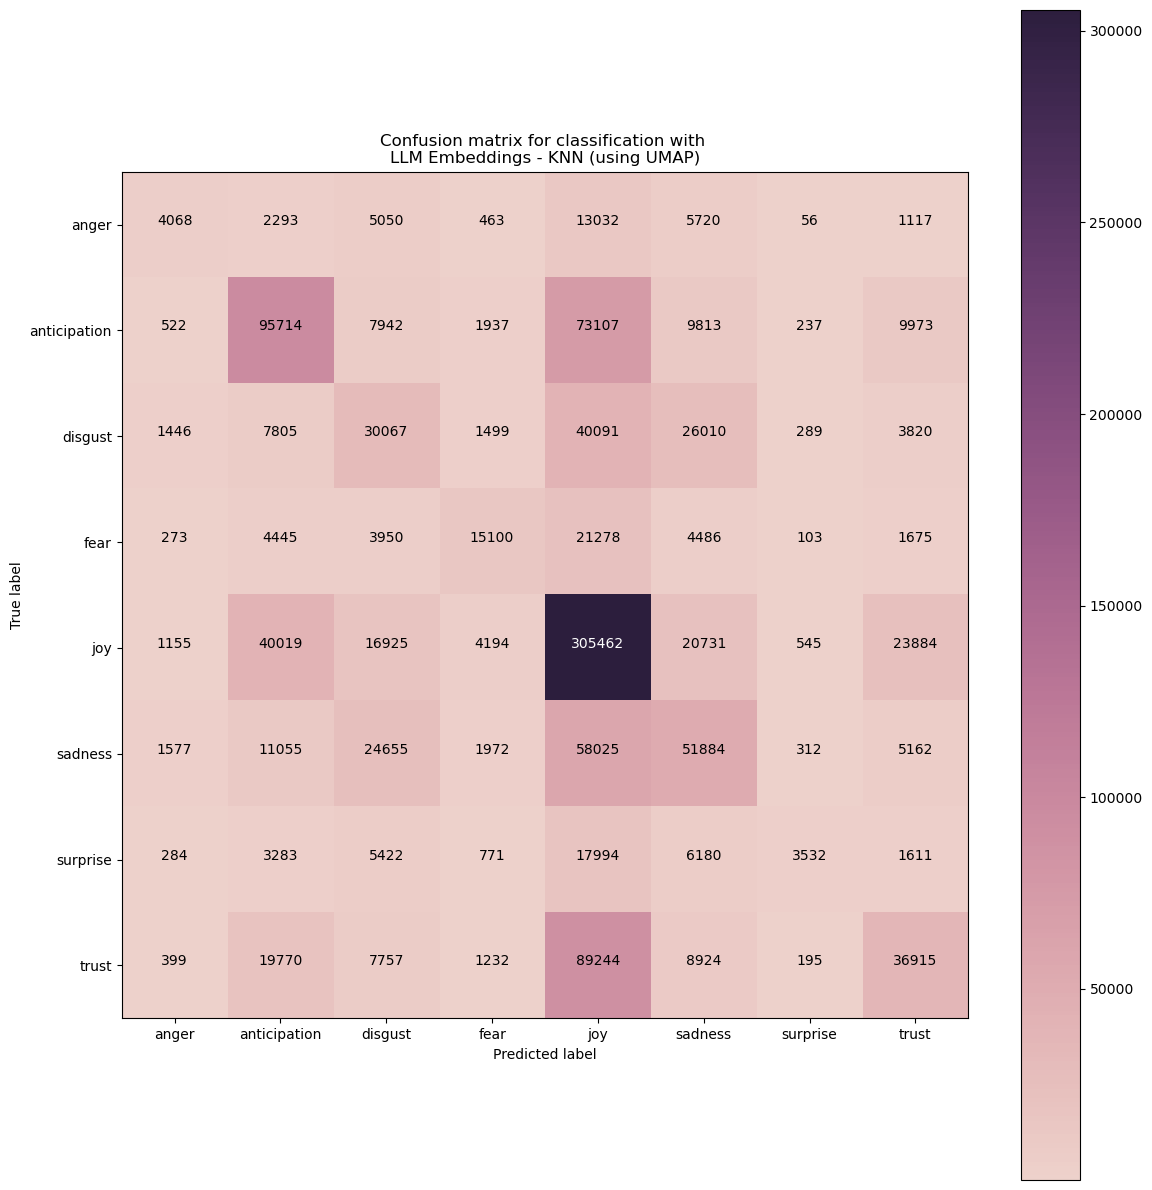

In [22]:
best_n_neighbors = 20
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)

knn.fit(X_subtrain_umap, y_subtrain)

# Predict test data
y_pred = knn.predict(X_subtest_umap)

# Calculate model accuracy
accuracy = accuracy_score(y_subtest, y_pred)
print(f'KNN Accuracy with UMAP (130 dimensions): {accuracy}')

# Plot confusion matrix
cm2 = confusion_matrix(y_true=y_subtest, y_pred=y_pred)

# Plot confusion matrix
plot_confusion_matrix(cm2, classes=emotion_types, title='Confusion matrix for classification with \nLLM Embeddings - KNN (using UMAP)')

By comparing the results of UMAP and PCA, we find that PCA performs slightly better than UMAP. This may be because the embedded data has a linear structure, which PCA can more effectively capture to distinguish between different data points.

# Method 8: NN + Embedding

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.layers import Input, Dense, Dropout, ReLU, Softmax
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
import numpy as np
import pandas as pd

# Extract embedding vectors
X_subtrain = np.vstack(X_subtrain['embeddings'].values)
X_subtest = np.vstack(X_subtest['embeddings'].values)

def label_encode(le, labels):
    enc = le.transform(labels)
    return to_categorical(enc)

# turn the label into one-hot encoding
y_subtrain_encode = label_encode(label_encoder, y_subtrain)
y_subtest_encode = label_encode(label_encoder, y_subtest)

# model architecture parameters
input_shape = X_subtrain.shape[1]
output_shape = len(emotion_types)

# === model architecture ===
# input layer
model_input = Input(shape=(input_shape,))

# first layer
X_W1 = Dense(units=512)(model_input)
H1 = ReLU()(X_W1)
H1 = Dropout(0.5)(H1)

# second layer
H1_W2 = Dense(units=256)(H1)
H2 = ReLU()(H1_W2)
H2 = Dropout(0.4)(H2)

# third layer
H2_W3 = Dense(units=128)(H2)
H3 = ReLU()(H2_W3)
H3 = Dropout(0.3)(H3)

# fourth layer
H3_W4 = Dense(units=64)(H3)
H4 = ReLU()(H3_W4)
H4 = Dropout(0.3)(H4)

# output layer
H4_W5 = Dense(units=output_shape)(H4)
model_output = Softmax()(H4_W5)

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# optimizer and learning rate decay
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# training callbacks

# early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # monitor validation loss
    patience=20,         # if no improvement for 10 epochs, stop training
    restore_best_weights=True  # restore best weights
)

# learning rate decay
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # monitor validation loss
    factor=0.5,          # halve the learning rate
    patience=5,          # if no improvement for 5 epochs, reduce learning rate
    min_lr=1e-6          # set the lower limit of learning rate
)

history = model.fit(
    X_subtrain, y_subtrain_encode,  # training data
    epochs=1000,                   # huge epoch
    batch_size=1024,                # batch size
    validation_data=(X_subtest, y_subtest_encode),  # validation data
    callbacks=[early_stopping, reduce_lr]  # callbacks
)

# training finished
print("Training Finished")

# === model prediction ===
pred_result = model.predict(X_subtest, batch_size=262144)
pred_result = np.argmax(pred_result, axis=1)
pred_result = label_encoder.inverse_transform(pred_result)

# result
print("Predicted Labels:", pred_result)


During the training process, we observed that the training stopped after approximately 180 epochs due to no improvement in the validation loss. Therefore, we adjusted the model training to use the entire training dataset for 180 epochs.
| **Class**        | **Precision** | **Recall** | **F1-Score** | **Support** |
|------------------|---------------|------------|--------------|-------------|
| **anger**        | 0.58          | 0.20       | 0.30         | 7,973       |
| **anticipation** | 0.65          | 0.58       | 0.61         | 49,787      |
| **disgust**      | 0.45          | 0.41       | 0.43         | 27,820      |
| **fear**         | 0.68          | 0.42       | 0.52         | 12,800      |
| **joy**          | 0.58          | 0.80       | 0.67         | 103,204     |
| **sadness**      | 0.47          | 0.53       | 0.50         | 38,687      |
| **surprise**     | 0.67          | 0.17       | 0.27         | 9,746       |
| **trust**        | 0.61          | 0.31       | 0.41         | 41,096      |
| **accuracy**     |               |            | **0.57**     | **291,113** |
| **macro avg**    | 0.59          | 0.43       | 0.46         | 291,113     |
| **weighted avg** | 0.58          | 0.57       | 0.55         | 291,113     |

![jupyter](./img/nn-1.png)\

In [ ]:
# extract embedding vectors
X_train = np.vstack(X_train_df_ST['embeddings'].values)
X_test = np.vstack(X_test_df_ST['embeddings'].values)

# label encoding
y_train_encode = label_encode(label_encoder, y_train)


# === model training ===
history = model.fit(
    X_train, y_train_encode,  # training data
    epochs=180,                   # huge epoch
    batch_size=1024,
    callbacks=[reduce_lr]  # callbacks
)

# training finished
print("Training Finished")

# === model prediction ===
pred_result = model.predict(X_test, batch_size=16384)
pred_result = np.argmax(pred_result, axis=1)
pred_result = label_encoder.inverse_transform(pred_result)

# result
print("Predicted Labels:", pred_result)
output_df = pd.DataFrame({
    'id': X_test_df['tweet_id'],
    'emotion': pred_result
})

# Save the test prediction result to a CSV file
output_df.to_csv('/content/drive/MyDrive/未命名資料夾/emotion_predictions_nn_final.csv', index=False)


The public score of this method is 0.47695.
![jupyter](./img/SCR-20241204-savs.png)

# Method 9: Embedding + PCA + RF

Random Forest Accuracy: 0.47296708921199776


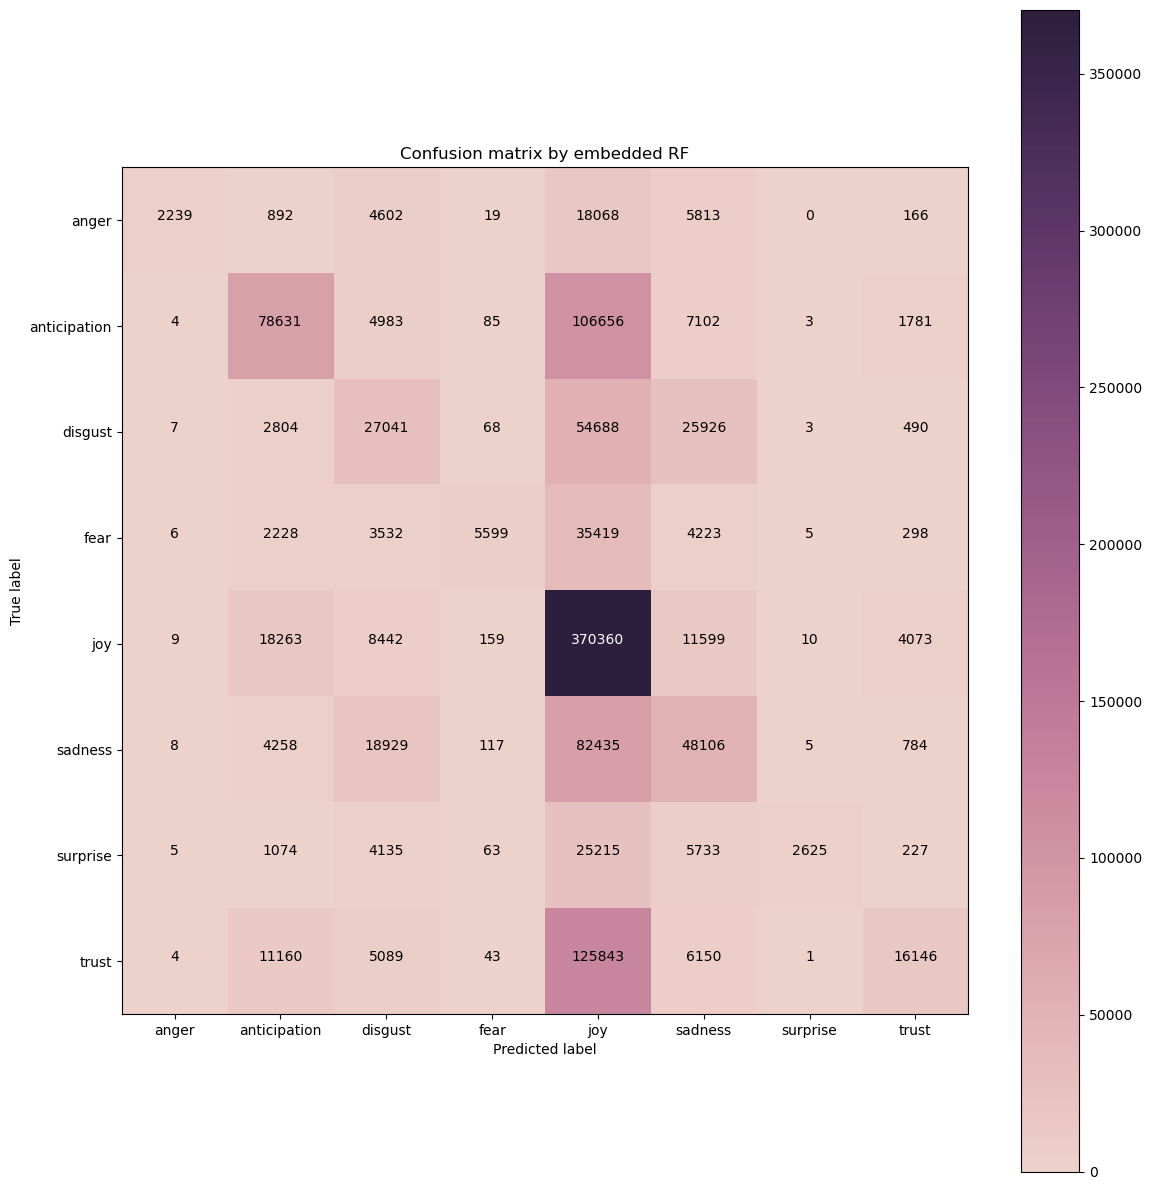

In [8]:

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# PCA dimension reduction to 100 dimensions
pca = PCA(n_components=100)

X_subtrain_pca = pca.fit_transform(X_subtrain)  # Dimension reduction for training data

X_subtest_pca = pca.transform(X_subtest)  # Dimension reduction for test data


# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train model
rf_model.fit(X_subtrain_pca, y_subtrain)

# Predict test data
y_pred = rf_model.predict(X_subtest_pca)

# Evaluate model accuracy
accuracy = accuracy_score(y_subtest, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

# Confusion matrix
cm = confusion_matrix(y_subtest, y_pred)
plot_confusion_matrix(cm, classes=emotion_types, title='Confusion matrix by embedded RF')

By analyzing the confusion matrix, we observe that the precision of 'anger' has improved significantly, while the precision of 'joy' has decreased. This may be due to the imbalanced training data, which caused the random forest trees to be biased towards 'joy,' leading to more predictions favoring 'joy'.

# Method 10: Embeddings + XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

# Load Data
X_train_df_ST = pd.read_pickle("/content/drive/MyDrive/未命名資料夾/X_train_embed_df.pkl") 

# Prepare Features and Labels
X_train_embed = np.vstack(X_train_df_ST['embeddings'])
X_test_df_ST = pd.read_pickle("/content/drive/MyDrive/未命名資料夾/X_test_embed_df.pkl") 

# Prepare Features and Labels
X_test_embed = np.vstack(X_test_df_ST['embeddings'])
y_train = X_train_df_ST['emotion']

# Encode Labels
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train_encoded = label_encoder.transform(y_train)
emotion_types = list(label_encoder.classes_)

# Split Data
X_subtrain, X_subval, y_subtrain, y_subval = train_test_split(
    X_train_embed, y_train_encoded, test_size=0.2, random_state=42, stratify=y_train_encoded
)

# Initialize XGBoost Model
xgb_model = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=len(np.unique(y_train_encoded)),
    n_estimators=500,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    tree_method='gpu_hist',
    gpu_id=0,
    verbosity=2,
    use_label_encoder=False,
    eval_metric="mlogloss"  # Set eval_metric here
)

# Train Model with Early Stopping
xgb_model.fit(
    X_subtrain, y_subtrain,
    eval_set=[(X_subval, y_subval)],
    verbose=True
)

# Predict on Validation Set
y_pred_encoded = xgb_model.predict(X_subval)

# Decode Predictions Back to Original Labels (Optional)
y_pred = label_encoder.inverse_transform(y_pred_encoded)
y_val = label_encoder.inverse_transform(y_subval)

# Evaluate the Model
accuracy = accuracy_score(y_val, y_pred)
print(f"XGBoost Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_val, y_pred))

# Generate Confusion Matrix
cm = confusion_matrix(y_val, y_pred, labels=emotion_types)
plot_confusion_matrix(cm, classes=emotion_types, title='Confusion Matrix by Embedded XGBoost')

# predict the final answer
y_pred = xgb_model.predict(X_test_embed)
output_df = pd.DataFrame({
    'id': X_test_df['tweet_id'],
    'emotion': y_pred
})

# Save the final prediction result to a CSV file
output_df.to_csv('/content/drive/MyDrive/未命名資料夾/emotion_predictions_XGBoost_final.csv', index=False)

XGBoost Accuracy: 0.5338\
Classification Report:
| **Class**       | **Precision** | **Recall** | **F1-Score** | **Support** |
|-----------------|---------------|------------|--------------|-------------|
| **anger**       | 0.55          | 0.18       | 0.27         | 7,973       |
| **anticipation**| 0.61          | 0.53       | 0.57         | 49,787      |
| **disgust**     | 0.41          | 0.39       | 0.40         | 27,820      |
| **fear**        | 0.67          | 0.31       | 0.43         | 12,800      |
| **joy**         | 0.54          | 0.81       | 0.65         | 103,204     |
| **sadness**     | 0.46          | 0.46       | 0.46         | 38,687      |
| **surprise**    | 0.72          | 0.13       | 0.22         | 9,746       |
| **trust**       | 0.57          | 0.24       | 0.34         | 41,096      |
| **accuracy**    |               |            | **0.53**     | **291,113** |
| **macro avg**   | 0.57          | 0.38       | 0.42         | 291,113     |
| **weighted avg**| 0.55          | 0.53       | 0.51         | 291,113     |

![jupyter](./img/XGBoost.png)\
The public score of this method is 0.46418.
![jupyter](./img/SCR-20241204-sqlo.png)

# Method 11: DeBERTa (Decoding-enhanced BERT with disentangled attention)
DeBERTa improves BERT by separating content and position information in attention and using relative position embeddings for better context understanding. This makes it more accurate in capturing relationships between words, leading to better performance in NLP tasks.\
The processes below was run on google colab.

In [ ]:
import torch
from transformers import DebertaV2Tokenizer, DebertaV2ForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
import numpy as np

X_train, X_val, y_train, y_val = train_test_split(
    X_train_df['text'], y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Load DeBERTa model and tokenizer
MODEL_NAME = "microsoft/deberta-v3-large"
tokenizer = DebertaV2Tokenizer.from_pretrained(MODEL_NAME)
model = DebertaV2ForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=len(emotion_types))

# Tokenization
def tokenize_function(examples):
    return tokenizer(examples, padding="max_length", truncation=True, max_length=256)

train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=256)
val_encodings = tokenizer(list(X_val), truncation=True, padding=True, max_length=256)
test_encodings = tokenizer(list(X_test_df['text']), truncation=True, padding=True, max_length=256)

# 5. Create Dataset class
class EmotionDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

# Convert labels to numbers
label2id = {label: idx for idx, label in enumerate(emotion_types)}
id2label = {idx: label for label, idx in label2id.items()}

y_train_encoded = [label2id[label] for label in y_train]
y_val_encoded = [label2id[label] for label in y_val]

train_dataset = EmotionDataset(train_encodings, y_train_encoded)
val_dataset = EmotionDataset(val_encodings, y_val_encoded)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)  # Select the class with highest probability as prediction
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="weighted")
    acc = accuracy_score(labels, predictions)
    return {
        "accuracy": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall
    }
# Training parameter settings
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=128,  # Batch size per device
    gradient_accumulation_steps=4,
    num_train_epochs=50,  # Set a high upper limit
    learning_rate=1e-5,
    fp16=True,
    evaluation_strategy="steps",  # Evaluate every certain steps
    eval_steps=2500,              # Evaluate every 2500 steps
    save_strategy="steps",        # Save every certain steps
    save_steps=2500,               # Save every 2500 steps
    logging_steps=100,            # Log every 100 steps
    save_total_limit=2,           # Keep only the 2 most recent files
    load_best_model_at_end=True,  # Load best model after training
    lr_scheduler_type="cosine",   # Cosine learning rate decay
    warmup_steps=500,             # Number of warmup steps
    dataloader_num_workers=8
)

# Initialize Trainer and add EarlyStoppingCallback
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
        callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]  # 3 evaluation steps without improvement, stop training
    )

trainer.train()

# evaluate the model
evaluation_results = trainer.evaluate()
print("Evaluation Results:", evaluation_results)

# predict and evaluate the test set
model.eval()
with torch.no_grad():
    predictions = trainer.predict(val_dataset)
    predicted_labels = [label_encoder.inverse_transform([idx])[0] for idx in np.argmax(predictions.predictions, axis=-1)]

test_accuracy = accuracy_score(y_val, predicted_labels)
print(f"Test Accuracy: {test_accuracy}")
print("Classification Report:\n", classification_report(y_val, predicted_labels))
cm = confusion_matrix(y_val, predicted_labels)
plot_confusion_matrix(cm, classes=emotion_types, title='Confusion Matrix for DeBERTa')

# extract training logs
log_history = trainer.state.log_history

# filter out logs containing evaluation results
eval_logs = [log for log in log_history if "eval_loss" in log]

# find the best step (based on eval_loss or eval_accuracy)
best_eval_log = min(eval_logs, key=lambda x: x["eval_loss"])  # if based on eval_loss
best_step = best_eval_log["step"]
print(f"Best step: {best_step}")

# calculate the number of steps per epoch
steps_per_epoch = len(train_dataset) // (training_args.per_device_train_batch_size * training_args.gradient_accumulation_steps)
best_epoch = best_step // steps_per_epoch
print(f"Best epoch: {best_epoch}")

Evaluation Results: {'eval_loss': 0.9886828660964966, 'eval_accuracy': 0.651551115889706, 'eval_f1': 0.6423704436868001, 'eval_precision': 0.6518982201040436, 'eval_recall': 0.651551115889706, 'eval_runtime': 2211.6767, 'eval_samples_per_second': 131.625, 'eval_steps_per_second': 16.454, 'epoch': 5.495713343591998} \
Test Accuracy: 0.651551115889706\
Classification Report:

| **Class**        | **Precision** | **Recall** | **F1-Score** | **Support** |
|------------------|---------------|------------|--------------|-------------|
| **anger**        | 0.58          | 0.36       | 0.44         | 7,973       |
| **anticipation** | 0.67          | 0.74       | 0.70         | 49,787      |
| **disgust**      | 0.54          | 0.54       | 0.54         | 27,820      |
| **fear**         | 0.67          | 0.58       | 0.62         | 12,800      |
| **joy**          | 0.69          | 0.80       | 0.74         | 103,204     |
| **sadness**      | 0.57          | 0.61       | 0.59         | 38,687      |
| **surprise**     | 0.70          | 0.28       | 0.40         | 9,746       |
| **trust**        | 0.69          | 0.45       | 0.54         | 41,096      |
| **accuracy**     |               |            | **0.65**     | **291,113** |
| **macro avg**    | 0.64          | 0.54       | 0.57         | 291,113     |
| **weighted avg** | 0.65          | 0.65       | 0.64         | 291,113     |


![jupyter](./img/DeBERTa_CM.png)\
Best step: 5000\
Best epoch: 2


By the above results, we can see that the DeBERTa model has achieved a good performance in the task of emotion classification. We can also know that the model has been trained for 2 epochs and stopped automatically because of no improvement in the validation loss.

In [ ]:
import torch
from transformers import DebertaV2Tokenizer, DebertaV2ForSequenceClassification, Trainer, TrainingArguments
import pandas as pd
import numpy as np

MODEL_NAME = "microsoft/deberta-v3-large"
tokenizer = DebertaV2Tokenizer.from_pretrained(MODEL_NAME)
model = DebertaV2ForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=len(emotion_types))

train_encodings = tokenizer(list(X_train_df['text']), truncation=True, padding=True, max_length=256)
y_train_encoded = [label_encoder.transform([label])[0] for label in y_train]
train_dataset = EmotionDataset(train_encodings, y_train_encoded)
test_dataset = EmotionDataset(test_encodings) 

# Training parameter settings
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=128,    # Batch size per device
    gradient_accumulation_steps=4,      # Gradient accumulation steps
    num_train_epochs=2,                 # Set the best number of epochs
    learning_rate=1e-5,
    fp16=True,                          # Use mixed precision training
    evaluation_strategy="no",           # Set to "no", meaning no evaluation
    save_strategy="epoch",              # Save every epoch
    save_total_limit=2,                 # Keep only the 2 most recent files
    load_best_model_at_end=False,       # Load best model after training
    lr_scheduler_type="cosine",         # Cosine learning rate decay
    warmup_steps=500,                   # Warmup steps
    dataloader_num_workers=8
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Start training
trainer.train()

# Use the model to predict X_test_df['text']
with torch.no_grad():
    predictions = trainer.predict(test_dataset)

# Get the predicted labels
predicted_labels = [label_encoder.inverse_transform([idx])[0] for idx in np.argmax(predictions.predictions, axis=-1)]

# Save the prediction results
output_df = pd.DataFrame({
    'id': X_test_df['tweet_id'],
    'emotion': predicted_labels
})

output_df.to_csv('emotion_predictions_DeBERTa_final.csv', index=False)


The public score of this method is 0.56193.
![jupyter](./img/SCR-20241204-tbhl.png)

In conclusion, the DeBERTa model has achieved the best performance among all the models we have tried. It has the highest accuracy and F1 score, and the confusion matrix shows that the model has a good performance in all emotion categories.